# Program using FEM to solve poisson for a Rectangular geometry with right triangular segmentation

We intially define the length, breadth, the number of elements in the rectangle, the number of rows and columns in the rectangle. We calculate the Area of triangular element and also some useful connection constants for the problem. Finally we define the shape and size of the global coupling matrix

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets


iter_numer = 0
nos_tri = 500 # Number of Triangles

l = 2
b = 1
nos_rows = 10             #### Define no.of elements in a row
nos_cols = 25           #### Define no.of elements in a col
xmin = l/(nos_cols)   ### the h in x axis
ymin = b/(nos_rows) ### the h in y axis
Area = 0.5*xmin*ymin  ## area of the triangle
cnn = (xmin**2+ymin**2)/(4*Area) ## the connections terms 
cnn_intern = 4*cnn
cnn_corner = cnn
cnn_side = 2*cnn
cnj = xmin**2/(4*Area)
cni = ymin**2/(4*Area)
nos = (nos_rows+1)*(nos_cols+1)
mesh = np.arange(0,nos).reshape(nos_rows+1,nos_cols+1)  ## mesh defined with respect to the given parameters
global_matrix = np.zeros((nos,nos),dtype = float)  ### global matrix which has all the connections in the mesh

We run through the entire rectangular region and calculate the connection terms in there and associate it with the global coupling matrix

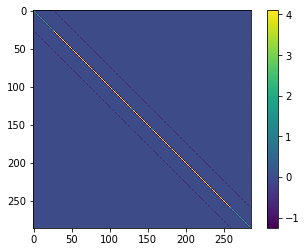

In [3]:
for x in range(0,len(mesh)):
    for y in range(0,len(mesh[x])):
        iter_numer +=1
        x1 = x+1
        y1 = y+1
        x2 = x-1
        y2 = y-1
        if (x2>=0 and x1 <=(len(mesh)-1) and y2 >=0 and y1 <=(len(mesh[x])-1)):   ### checks if it is a internal node
            point = mesh[x][y]
            place_holder2 = mesh[x1][y]
            place_holder3 = mesh[x2][y]
            place_holder4 = mesh[x][y1]
            place_holder5 = mesh[x][y2]
            global_matrix[point][point] = cnn_intern
            global_matrix[point][place_holder2] = -2*cnj    ### based on the position and connections to near by neighbour 
            global_matrix[point][place_holder3] = -2*cnj   ### weights are assigned and are associated to the global matrix
            global_matrix[point][place_holder4] = -2*cni
            global_matrix[point][place_holder5] = -2*cni
#        else:
 #           print("its a boundary",iter_numer)
        if ((x2 < 0 and y2 < 0)):     ### checks for boundary nodes and other corner nodes 
            point = mesh[x][y]
            place_holder2 = mesh[x1][y]
            place_holder4 = mesh[x][y1]
            global_matrix[point][point] = cnn_corner
            global_matrix[point][place_holder2] = -1*cnj
            global_matrix[point][place_holder4] = -1*cnj
        if ((x1 > (len(mesh)-1) and y2 < 0)):
            point = mesh[x][y]
            place_holder3 = mesh[x2][y]
            place_holder4 = mesh[x][y1]
            global_matrix[point][point] = cnn_corner
            global_matrix[point][place_holder3] = -1*cnj
            global_matrix[point][place_holder4] = -1*cni
        if ((x1 >= (len(mesh)) and y1 >= (len(mesh[x])))):
            point = mesh[x][y]
            place_holder3 = mesh[x2][y]
            place_holder5 = mesh[x][y2]
            global_matrix[point][point] = cnn_corner
            global_matrix[point][place_holder3] = -1*cnj
            global_matrix[point][place_holder5] = -1*cni
        if ((x2 < 0 and y1 >= (len(mesh[x])))):
            point = mesh[x][y]
            place_holder2 = mesh[x1][y]
            place_holder5 = mesh[x][y2]
            global_matrix[point][point] = cnn_corner
            global_matrix[point][place_holder2] = -1*cnj
            global_matrix[point][place_holder5] = -1*cni
        if(x2 == -1 and (y >= 1 and y1 <= (len(mesh[x])-1))):
            point = mesh[x][y]
            place_holder5 = mesh[x][y2]
            place_holder4 = mesh[x][y1]
           # print("passed y1 = ",y1)
            place_holder2 = mesh[x1][y]
            global_matrix[point][point] = cnn_side
            global_matrix[point][place_holder2] = -2*cnj
            global_matrix[point][place_holder4] = -2*cnj
            global_matrix[point][place_holder5] = -1*cni
        if(x1 == len(mesh) and (y >= 1 and y1 <= (len(mesh[x])-1))):
            point = mesh[x][y]
            place_holder5 = mesh[x][y2]
            place_holder4 = mesh[x][y1]
            place_holder3 = mesh[x2][y]
            global_matrix[point][point] = cnn_side
            global_matrix[point][place_holder3] = -2*cnj
            global_matrix[point][place_holder4] = -1*cni
            global_matrix[point][place_holder5] = -1*cni
        if(y1 == len(mesh[x]) and (x >= 1 and x1 <= (len(mesh)-1))):
            point = mesh[x][y]
            place_holder2 = mesh[x1][y]
            place_holder3 = mesh[x2][y]
            place_holder5 = mesh[x][y2]
            global_matrix[point][point] = cnn_side
            global_matrix[point][place_holder5] = -2*cni
            global_matrix[point][place_holder2] = -1*cnj
            global_matrix[point][place_holder3] = -1*cnj
        if(y2 == -1 and (x >= 1 and x1 <= (len(mesh)-1))):
            point = mesh[x][y]
            place_holder2 = mesh[x1][y]
            place_holder3 = mesh[x2][y]
            place_holder4 = mesh[x][y1]
            global_matrix[point][point] = cnn_side
            global_matrix[point][place_holder4] = -2*cni
            global_matrix[point][place_holder2] = -1*cnj
            global_matrix[point][place_holder3] = -1*cnj
plt.imshow(global_matrix)    ##### to show out the matrix in a form of an image. its a sparse matrix
plt.colorbar()

From the global matrix we extract the internal nodes and the boundary nodes to calculate the $C_{ff}$ and $C_{fp}$

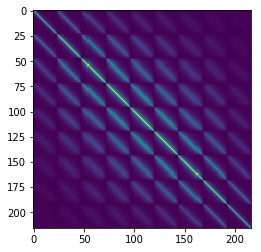

In [4]:
internal_node1 = mesh[1][1]
xx = len(mesh)-2
internal_node2 = mesh[xx][len(mesh[xx])-2]
cff = global_matrix[internal_node1:internal_node2+1,internal_node1:internal_node2+1]   ### chooses the internal nodes 
cff1=cff
a = []
for x in range(len(cff)):   ### in order to delete some of the boundary nodes in the internal matrix
    for y in range(len(cff[x])):
        if(x==y):
  #          print(cff[x][y])
            if(cff[x][y]!=cnn_intern):
               # print(x,y)
                a.append(x)
#print(mesh)
cff1 = np.delete(cff,a,0)
cff1 = np.delete(cff1,a,1)    
cff1_inv = np.linalg.inv(cff1)  #### calculate the inverse to use it in the formula 
plt.imshow(cff1_inv)    #### shows the internal matrix
b = []
c = []
for x in range(len(global_matrix)):     #### A loop to calculate the cfp deletes the columns corresponding to internal nodes
    for y in range(len(global_matrix[x])):
        if(x==y):
            if(global_matrix[x][y]!=cnn_intern):
                b.append(x)
            if(global_matrix[x][y] == cnn_intern):
                c.append(x)
cfp = np.delete(global_matrix,b,0)
cfp = np.delete(cfp,c,1)   ### cfp used in the formula

We now define the boundary potentials for the rectangular mesh. Then we apply the formula $U_{internal} = -C_{ff}^{-1} C_{fp}U_{boundary}$

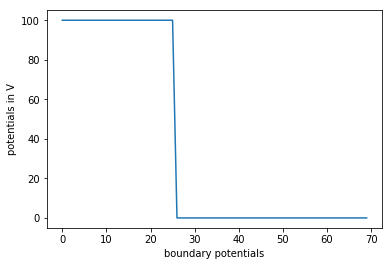

In [5]:
length = len(mesh)
breadth = len(mesh[0])
size_boundary_potentials = 2*(length+breadth)-4
boundary_potentials = np.zeros((size_boundary_potentials,1),dtype = float)
boundary_potentials[0:breadth] = 100   ### We can define other potentials too
#print(boundary_potentials)
plt.plot(boundary_potentials)
plt.xlabel("boundary potentials")
plt.ylabel("potentials in V")
cfp_potentials = -1*np.dot(cfp,boundary_potentials)  ### we apply the formula as discussed above
unknown_potential = np.dot(cff1_inv,cfp_potentials)  ### we calculate the unknown internal potentials

We now show the results in various ways. A 2d Histogram a 3D surface plot and a residue plot to compare the results with the numerical solution

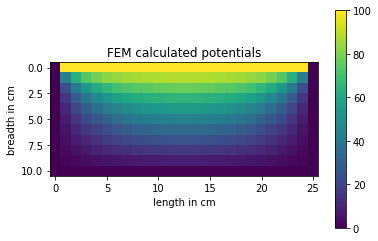

In [6]:
s = 0
result = np.zeros((nos_rows+1,nos_cols+1),dtype = float)
for x in range(1,len(mesh)-1):
    for y in range(1,len(mesh[x])-1):
        result[x][y] = unknown_potential[s]
        s+=1
result[0,1:len(result[0])-1] = 100
plt.imshow(result)
plt.xlabel("length in cm")
plt.ylabel("breadth in cm")
plt.title("FEM calculated potentials")
plt.colorbar()
plt.show()

To compare with the exact solution a small loop is written with k = 100 to calculate the potential at the prescribed nodes.

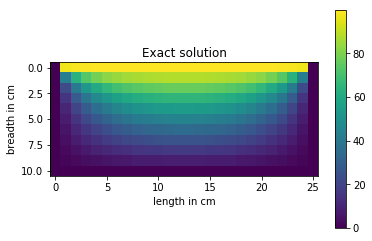

In [7]:
exact_sol = np.zeros((nos_cols+1,nos_rows+1),dtype = float)
for x in range(len(exact_sol)):
    for y in range(len(exact_sol[x])):
        potential = 0
        for k in range(0,100):
            n = 2*k+1
            x1 = x*xmin
            y1 = y*ymin
            aaa = np.sin(n*np.pi*x1/2*1)
            bbb = np.sinh(n*np.pi*y1/2)
            ccc = n*np.sinh(n*np.pi*0.5)
            potential += (aaa*bbb)/ccc
        #print(x,y)
        exact_sol[x][y] = 4*100*potential/np.pi
exact_sol1 = exact_sol.T
exact_sol2 = np.zeros((len(exact_sol1),len(exact_sol1[0])))
for x in range(len(exact_sol2)):
    exact_sol2[x] = exact_sol1[len(exact_sol1)-1-x]
plt.imshow(exact_sol2)
plt.xlabel("length in cm")
plt.ylabel("breadth in cm")
plt.title("Exact solution")
plt.colorbar()

A residual plot is made to give a flavour of how well the predictions are

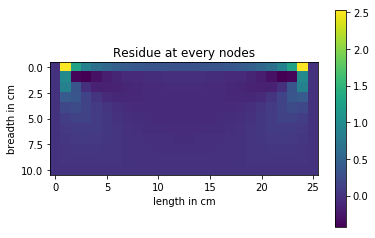

In [8]:
residue = result-exact_sol2
plt.imshow(residue)
plt.xlabel("length in cm")
plt.ylabel("breadth in cm")
plt.title("Residue at every nodes")
plt.colorbar()

We now make a 3d surface plot on the same to see the results

In [9]:
xi = []
yi = []
V_FEM = []
V_CALC = []
for x in range(len(result)):
    for y in range(len(result[x])):
        xi.append(x)
        yi.append(y)
        V_FEM.append(result[x][y])
        V_CALC.append(exact_sol2[x][y])
def f(theta,phi):
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    #res = ax.plot_trisurf(xi, yi, V_FEM, linewidth=0.2, cmap=plt.cm.Spectral)
    xxx = np.arange(0,nos_cols+1)
    yyy = np.arange(0,nos_rows+1)
    X,Y = np.meshgrid(xxx,yyy)
    #ax.contour3D(X, Y, result,50,linewidths=2)
    res = ax.plot_surface(X, Y, result,cmap ='viridis')
    fig.colorbar(res)
    plt.title("FEM solution")
    ax.view_init(phi, theta)
interact(f,theta=30,phi=30)
f(theta=30,phi=30)
def f1(theta,phi):
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    #res = ax.plot_trisurf(xi, yi, V_FEM, linewidth=0.2, cmap=plt.cm.Spectral)
    xxx = np.arange(0,nos_cols+1)
    yyy = np.arange(0,nos_rows+1)
    X,Y = np.meshgrid(xxx,yyy)
    res = ax.plot_surface(X, Y, exact_sol2,cmap ='viridis')
    fig.colorbar(res)
    ax.view_init(phi, theta)
interact(f1,theta=30,phi=30)
f1(theta=30,phi=30)

interactive(children=(IntSlider(value=30, description='theta', max=90, min=-30), IntSlider(value=30, descripti…

interactive(children=(IntSlider(value=30, description='theta', max=90, min=-30), IntSlider(value=30, descripti…

<function __main__.f1(theta, phi)>

We calculate and display the potentials at each triangular element

In [10]:
xi1 = []
yi1 = []
V_FEM1 = []
V_CALC1 = []
new_result = np.zeros((nos_rows*2,nos_cols*2),dtype = float)
for x in range(len(result)):
    x_pos = 0
    for y in range(len(result[x])):
            y_pos = 0
            x1 = x+1
            y1 = y+1
            x2 = x-1
            y2 = y-1
            if(x1!=len(result) and y1!=len(result[x])):
                xi1.append((x+x1+x)*ymin/3)
                xi1.append((x1+x1+x)*ymin/3)
                yi1.append((y+y+y1)*xmin/3)
                yi1.append((y+y1+y1)*xmin/3)
                V_FEM1.append((result[x][y]+result[x1][y]+result[x][y1])/3)
                V_FEM1.append((result[x1][y]+result[x1][y1]+result[x][y1])/3)
                V_CALC1.append((exact_sol2[x][y]+exact_sol2[x1][y]+exact_sol2[x][y1])/3)
                V_CALC1.append((exact_sol2[x1][y]+exact_sol2[x1][y1]+exact_sol2[x][y1])/3)
def f(theta,phi):
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    res = ax.plot_trisurf(xi1, yi1, V_FEM1, linewidth=1, cmap='viridis')
    #res = ax.plot_surface(X, Y,new_result,cmap ='viridis')
    fig.colorbar(res)
    plt.xlabel("Breadth (cm)")
    plt.ylabel("Length (cm)")
    ax.view_init(phi, theta)
    plt.title("FEM solution")
interact(f,theta=-20,phi=30)
f(theta=30,phi=30)
def f1(theta,phi,dist=10):
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    res = ax.plot_trisurf(xi1, yi1, V_CALC1, linewidth=1, cmap='viridis')
    #res = ax.plot_surface(X, Y,new_result,cmap ='viridis')
    fig.colorbar(res)
    plt.xlabel("Breadth (cm)")
    plt.ylabel("Length (cm)")
    ax.view_init(phi, theta)
    ax.dist = dist
    plt.title("Exact Solution")
interact(f1,theta=-20,phi=30,dist=10)
f1(theta=30,phi=30)

interactive(children=(IntSlider(value=-20, description='theta', max=20, min=-60), IntSlider(value=30, descript…

interactive(children=(IntSlider(value=-20, description='theta', max=20, min=-60), IntSlider(value=30, descript…

<function __main__.f1(theta, phi, dist=10)>

Finally we plot the residuals of the plots with the exact solutions

Text(0.5, 1.0, 'Residue FEM-Exact')

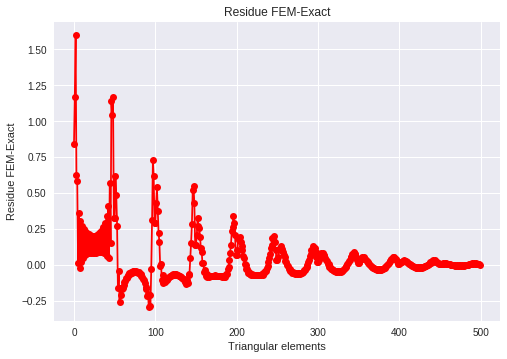

In [13]:
V_FEM1_a = np.array(V_FEM1)
V_CALC1_a = np.array(V_CALC1)
residue = V_FEM1_a-V_CALC1_a
tri = np.arange(0,nos_tri)
plt.plot(tri,residue,'ro-')
plt.style.use('seaborn')
plt.xlabel("Triangular elements")
plt.ylabel("Residue FEM-Exact")
plt.title("Residue FEM-Exact")

Text(0.5, 1.0, 'Residue FEM-Exact')

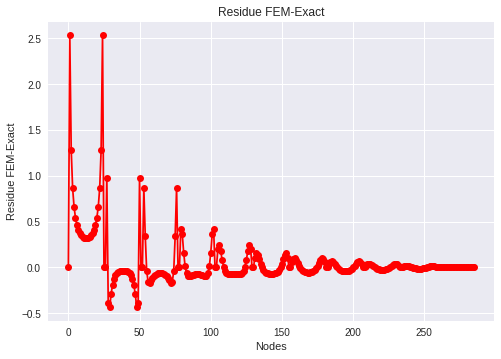

In [14]:
V_FEMa = np.array(V_FEM)
V_CALCa = np.array(V_CALC)
residue = V_FEMa-V_CALCa
tri = np.arange(0,nos_tri)
plt.plot(residue,'ro-')
plt.style.use('seaborn')
plt.xlabel("Nodes")
plt.ylabel("Residue FEM-Exact")
plt.title("Residue FEM-Exact")